<a href="https://colab.research.google.com/github/yryrgogo/data_analysis/blob/master/Gaussian_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ガウス過程回帰

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from numpy.random import multivariate_normal as mvnrand

import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
def kgauss (params):
    [tau,sigma] = params
    return lambda x,y: tau * exp (-(x - y)**2 / (2 * sigma * sigma))

def kv (x, xtrain, kernel):
    return np.array ([kernel(x,xi) for xi in xtrain])

def kernel_matrix (xx, kernel):
    N = len(xx)
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def gpr (xx, xtrain, ytrain, kernel):
    K = kernel_matrix (xtrain, kernel)
    Kinv = np.linalg.inv(K)
    ypr = []; spr = []
    for x in xx:
        s = kernel (x,x) + eta
        k = kv (x, xtrain, kernel)
        ypr.append (k.T.dot(Kinv).dot(ytrain))
        spr.append (s - k.T.dot(Kinv).dot(k))
    return ypr, spr

def gpplot (xx, xtrain, ytrain, kernel, params):
    ypr,spr = gpr (xx, xtrain, ytrain, kernel(params))
    plot (xtrain, ytrain, 'bx', markersize=16)
    plot (xx, ypr, 'b-')
    fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')

In [8]:
# Data Load
train = np.loadtxt ('gpr.dat',dtype=float)

# plot parameters
N    = 100
xmin = -1
xmax = 3.5
ymin = -1
ymax = 3

# GP kernel parameters
eta   = 0.1
tau   = 1
sigma = 1

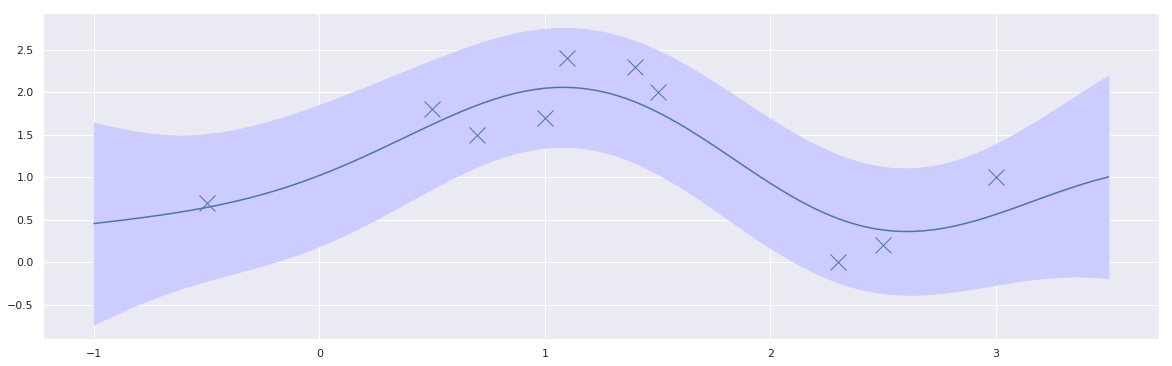

In [9]:
xtrain = train.T[0]
ytrain = train.T[1]
kernel = kgauss
params = [tau,sigma]
xx = np.linspace (xmin, xmax, N)
plt.figure(figsize=(20, 6))
gpplot (xx, xtrain, ytrain, kernel, params)
plt.show()

ガウス過程の中のコードを掘り下げる

In [10]:

def kgauss (params):
    '''
    Explain:
        ガウスカーネル
    Args:
    Return:
    '''
    [tau,sigma] = params
    return lambda x,y: tau * exp (-(x - y)**2 / (2 * sigma * sigma))

def kv (x, xtrain, kernel):
    '''
    Explain:
        入力データとあるデータ点のカーネル写像
    Args:
    Return:
    '''
    return np.array ([kernel(x,xi) for xi in xtrain])

def kernel_matrix (xx, kernel):
    '''
    Explain:
        カーネル行列を取得
        入力はデータ点同士の距離
    Args:
    Return:
    '''
    N = len(xx)
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def gpr (xx, xtrain, ytrain, kernel):
    '''
    Explain:
    Args:
        xx: plot indicator
    Return:
    '''
    
    # カーネル行列
    K = kernel_matrix (xtrain, kernel)
    # カーネル行列が逆行列をもつか
    Kinv = inv(K)
    ypr = []
    spr = []
    for x in xx:
        # 同じ座標のデータを入れてるので、完全な予測線のデータ（100%正解の予測）が出てくる？
        s = kernel (x,x) + eta
        # 入力データとメモリのカーネル行列
        k = kv (x, xtrain, kernel)
        # メモリのカーネル行列と正解データの内積（スカラー）
        ypr.append (k.T.dot(Kinv).dot(ytrain))
        # 正解の予測線
        spr.append (s - k.T.dot(Kinv).dot(k))
    return ypr, spr


def gpplot (xx, xtrain, ytrain, kernel, params):
    ypr,spr = gpr (xx, xtrain, ytrain, kernel(params))
    plot (xtrain, ytrain, 'bx', markersize=16)
    plot (xx, ypr, 'b-')
    fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')

    
def kernel_matrix (xx, kernel):
    N = len(xx)
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

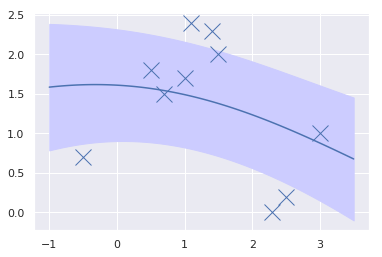

In [11]:
# カーネル行列
kernel = kgauss([1, 5])
K = kernel_matrix (xtrain, kernel)
# カーネル行列が逆行列をもつか
Kinv = inv(K)
ypr = []
spr = []
xx = np.linspace (xmin, xmax, N)

for x in xx:
    # x=yとなる値を入力してるので、ループ毎に同じ値が出てくる
    s = kernel (x,x) + eta
    # 入力データとメモリのカーネル行列
    k = kv (x, xtrain, kernel)
    # メモリのカーネル行列とカーネル行列の逆行列を積して、正解データとの内積をとってスカラーが出る
    # このyprはガウス過程の予測結果
    ypr.append (k.T.dot(Kinv).dot(ytrain))
    # 入力xとメモリのカーネル行列に、カーネル行列の逆行列を積して、さらにメモリのカーネル行列と内積をとってスカラーが出る
    # strは信頼区間を表示するための予測の分散(なぜこの式になるのかわからない)
    spr.append (s - k.T.dot(Kinv).dot(k))
    
ypr,spr = gpr (xx, xtrain, ytrain, kernel)
plot (xtrain, ytrain, 'bx', markersize=16)
plot (xx, ypr, 'b-')
fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')
plt.show()

### ガウス過程と機械学習

共分散行列  
対角成分は各確率変数の分散、それ以外は2つの確率変数の共分散となった行列

In [79]:
x1 = np.arange(3)+1
# x2 = np.arange(1, 4, 1)
x2 = np.zeros(3)
cov = np.cov(x1, x2)
print(cov)
sys.exit()
# 共分散行列をもち、平均0の多変量ガウス分布からのサンプリング
y_gp = np.random.multivariate_normal(np.zeros(len(cov)), cov)
# 上記の共分散行列の場合、強い反相関と近い平均を持っているので、正負は異なるが近しい絶対値の2点が得られる
y_gp

[[1. 0.]
 [0. 0.]]


SystemExit: 

/mnt/c/Git/go/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


p69  
式(3.27)  
ガウスカーネル(theta_1=1, theta_2=1)をカーネル関数とし、入力がx = [1,2,3,4]だった時の共分散行列K

In [12]:
#========================================================================
# ガウスカーネル
def gauss_kernel(x, tx, theta_1=0.1, theta_2=0.1):
    kxx = theta_1 * np.exp( -1 * np.power(np.abs(x - tx), 2) / theta_2**2 )
    return kxx
    
K = []
# ガウスカーネルのパラメータ(RBFカーネル)
theta_1 = 1
theta_2 = 1
#========================================================================

# Input X
X = np.arange(4) + 1
N = len(X)

#========================================================================
# ガウスカーネルにおける共分散行列を計算 
"""
ここでの共分散行列の計算を見ると、共分散行列がどう使われているのかがとてもわかりやすい。
カーネル関数で写像したXの各データ点同士（同じXベクトルの次元）の内積を計算しているだけ。
(1点目は1~4点目とどれだけ近いか？2点目は1~4点目とどれだけ近いか？...)
"""
for xi in X:
    for xj in X:
        s = gauss_kernel(xi, xj, theta_1, theta_2)
        K.append(s)
K = pd.DataFrame(np.array(K).reshape(N, N))
#========================================================================
display(K)

,0,1,2,3
0,1.000000,0.367879,0.018316,0.000123
1,0.367879,1.000000,0.367879,0.018316
2,0.018316,0.367879,1.000000,0.367879
3,0.000123,0.018316,0.367879,1.000000


P69,70  
次に、平均0で上記Kを共分散行列にもつ4次元のガウス分布からのサンプル、すなわち4次元のベクトルy~N(0, K)を1つランダムに生成すると、

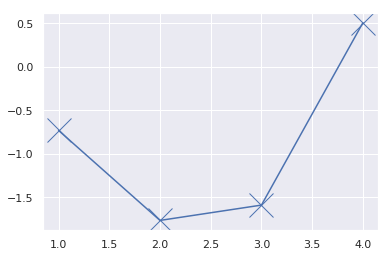

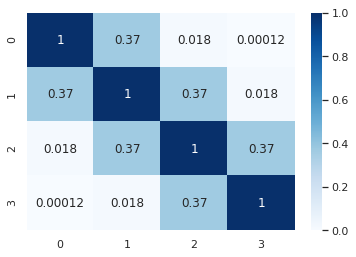

In [15]:
import seaborn as sns
%matplotlib inline
sns.set()

std = 1
tmp_mx = []

#========================================================================
# ガウス過程からのサンプリング 
"""
ガウス過程の考え方として
1. 共分散行列を入力データとカーネル関数から計算
2. 各データ点における予測値（分布）は多変量ガウス分布からのサンプリングになる.その多変量ガウス分布の共分散行列が1のものになる。平均は0とできる
(ここで疑問なのは、共分散行列をxから計算すると、当然xの値が近いもの同士の共分散が大きくなる。それは自然なことだが、単軸だと非線形な関係は表せない。だから多変量か。そりゃそうだな)

"""

#コレスキー分解を使う場合
L = np.linalg.cholesky(K)
y_gp = np.dot(L, X)

# numpy functionを使う場合
# 共分散行列Kを指定した多変量正規分布からのサンプリング
y_gp = np.random.multivariate_normal(np.zeros(len(K)), K)
#========================================================================

sns.color_palette(n_colors=24)
plt.plot(X, y_gp, 'bx', markersize=24)
plt.plot(X, y_gp, 'b-')
# sns.pointplot(x=X, y=y_gp)
# fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')
plt.show()
sns.heatmap(K, cmap='Blues', annot=True)
plt.show()

p69  
式(3.27)  
ガウスカーネル(theta_1=1, theta_2=1)をカーネル関数とし、入力がx = [1,2,3,4]だった時の共分散行列K

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


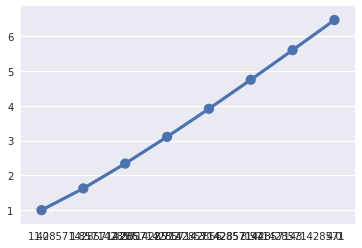

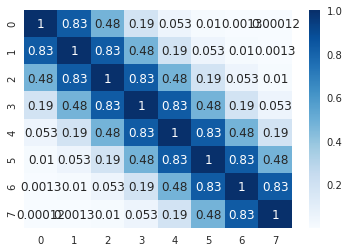

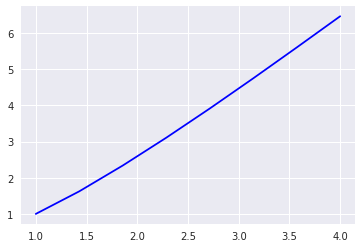

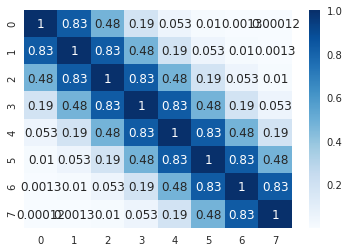

In [170]:
import pandas as pd
%matplotlib inline
sns.set()


#========================================================================
# ガウスカーネル
def gauss_kernel(x, tx, theta_1=0.1, theta_2=0.1):
    kxx = theta_1 * np.exp( -1 * np.power(np.abs(x - tx), 2) / theta_2**2 )
    return kxx
    
K = []
theta_1 = 1
theta_2 = 1
#========================================================================

# Input X
X = np.linspace(1, 4, 8)
N = len(X)

#========================================================================
# ガウスカーネルにおける共分散行列を計算 
"""
ここでの共分散行列の計算を見ると、共分散行列がどう使われているのかがとてもわかりやすい。
カーネル関数で写像したXの各データ点同士（同じXベクトルの次元）の内積を計算しているだけ。
(1点目は1~4点目とどれだけ近いか？2点目は1~4点目とどれだけ近いか？...)
"""
for xi in X:
    for xj in X:
        s = gauss_kernel(xi, xj, theta_1, theta_2)
        K.append(s)
K = pd.DataFrame(np.array(K).reshape(N, N))
#========================================================================


std = 1
tmp_mx = []

#コレスキー分解
L = np.linalg.cholesky(K)
y_gp = L@X

sns.color_palette(n_colors=24)
sns.pointplot(X, y_gp)
# plt.plot(X, y_gp, 'bx', markersize=24)
# plt.plot(X, y_gp, 'b-')
# sns.pointplot(x=X, y=y_gp)
# fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')
plt.show()
sns.heatmap(K, cmap='Blues', annot=True)
plt.show()


plt.plot(X, y_gp, 'bx', markersize=16)
plt.plot(X, y_gp, 'b-')
# sns.pointplot(x=X, y=y_gp)
# fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')
plt.show()
sns.heatmap(K, cmap='Blues', annot=True)
plt.show()

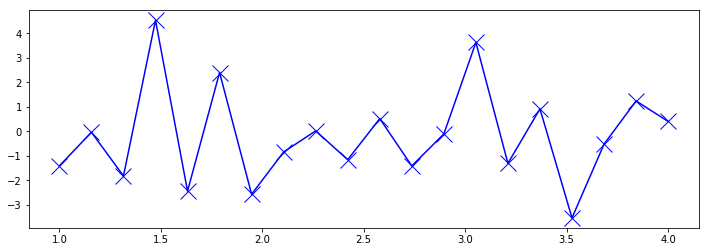

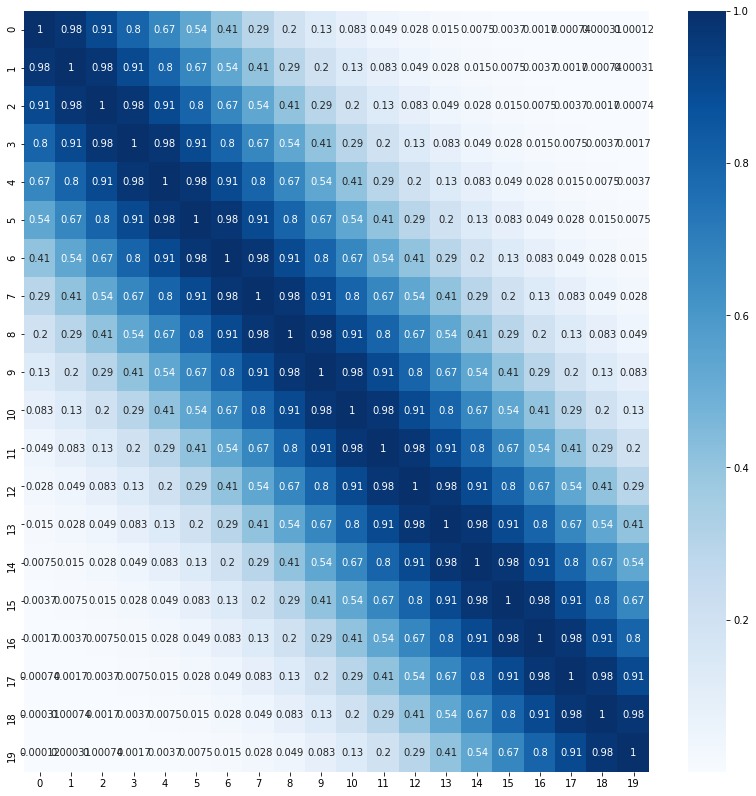

In [67]:
import pandas as pd


#========================================================================
# ガウスカーネル
def gauss_kernel(x, tx, theta_1=0.1, theta_2=0.1):
    kxx = theta_1 * np.exp( -1 * np.power(np.abs(x - tx), 2) / theta_2**2 )
    return kxx
    
K = []
theta_1 = 1
theta_2 = 1
#========================================================================

# Input X
X = np.linspace(1, 4, 20)
N = len(X)

#========================================================================
# ガウスカーネルにおける共分散行列を計算 
"""
ここでの共分散行列の計算を見ると、共分散行列がどう使われているのかがとてもわかりやすい。
カーネル関数で写像したXの各データ点同士（同じXベクトルの次元）の内積を計算しているだけ。
(1点目は1~4点目とどれだけ近いか？2点目は1~4点目とどれだけ近いか？...)
"""
for xi in X:
    for xj in X:
        s = gauss_kernel(xi, xj, theta_1, theta_2)
        K.append(s)
K = pd.DataFrame(np.array(K).reshape(N, N))
#========================================================================

import seaborn as sns

tmp_mx = []
for std in K.values.ravel():
    sample = np.random.normal(loc=0, scale=std, size=1)[0]
    tmp_mx.append(sample)
tmp_mx = np.array(tmp_mx).reshape(N, N)
y_gp = tmp_mx.sum(axis=0)

plt.figure(figsize=(12, 4))
plt.plot(X, y_gp, 'bx', markersize=16)
plt.plot(X, y_gp, 'b-')
# sns.pointplot(x=X, y=y_gp)
# fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')
plt.show()
plt.figure(figsize=(14, 14))
sns.heatmap(K, cmap='Blues', annot=True)
plt.show()

In [81]:
#コレスキー分解
P = np.linalg.cholesky(Sig)

# z ~ N(z | mu, Sig)
z_s = P.dot(y_s) + mu

plt.figure(figsize=(40, 40))
sns.heatmap(z_s, cmap='Blues')

[[0.5]
 [0.4]]


SystemExit: 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
